## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [109]:
import numpy as np
import pandas as pd
student_df = pd.read_csv("students-data.csv",sep=';')               
st_df=student_df
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [112]:
student_df.shape


(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [2]:
st_df.index.name="number"
st_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#isnull() function returns a boolean output and sum() gives the number of true values which is a count of missiing numbers.
if (st_df.isnull().sum().sum()==0):
    print("There are no missing values \n",st_df.isnull().sum().sum())


There are no missing values 
 0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [119]:
print("Not Numerical\n",st_df.select_dtypes(include=["category",object]).dtypes,"\n")
#print("Numerical \n",st_df.select_dtypes(exclude=["category",object]).dtypes,"\n")

Not Numerical
 school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object 



## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [5]:
print("Numerical \n",st_df.select_dtypes(exclude=["category",object]).dtypes,"\n")
st_df_new=st_df.drop(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'],axis=1)
print("The Final list of Column names after dropping variables with Variance < 1\n",st_df_new.columns)

Numerical 
 age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object 

The Final list of Column names after dropping variables with Variance < 1
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [6]:
seq= st_df.select_dtypes(include=['object'])
categorical_cols= seq.columns.tolist()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
st_df[categorical_cols] = st_df[categorical_cols].apply(lambda col: le.fit_transform(col))
st_df[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [7]:
#st_df['G1','G2','G3'].astype(int)
st_df.G1.astype(int)
st_df.G2.astype(int)
st_df.G3.astype(int)
st_df['G1'] = np.where(st_df['G1']<10, '0', '1')
st_df['G2'] = np.where(st_df['G2']<10, '0', '1')
st_df['G3'] = np.where(st_df['G3']<10, '0', '1')
print(st_df[['G1','G2','G3']].head())

       G1 G2 G3
number         
0       0  0  0
1       0  0  0
2       0  0  1
3       1  1  1
4       0  1  1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [120]:
array = st_df.values
# All variables except the last column are independent variables
X = array[:, :-1] 
#print(X)
# The last column G3 is the target attribute
y = array[:,-1] 
#print(y)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

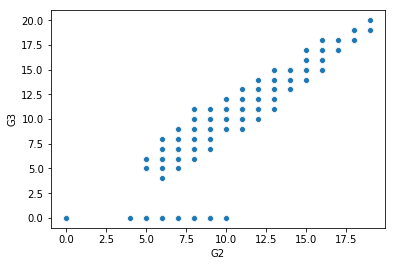

In [121]:
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#print(student_df.head())
sns.scatterplot(x="G2", y="G3", data=student_df)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

	 Students Vs School
 AxesSubplot(0.125,0.125;0.775x0.755)


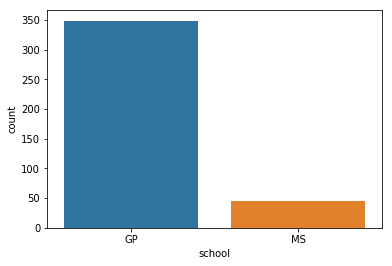

In [17]:
# Number of students in each school 
# 'GP' - Gabriel Pereira value 0
# MS' - Mousinho da Silveira value 1

st_df.groupby(["school"]).count()
print("\t Students Vs School\n",sns.countplot(x="school", data=st_df))

school  age
0       15      82
        16     104
        17      86
        18      57
        19      18
        20       1
        22       1
1       17      12
        18      25
        19       6
        20       2
        21       1
dtype: int64


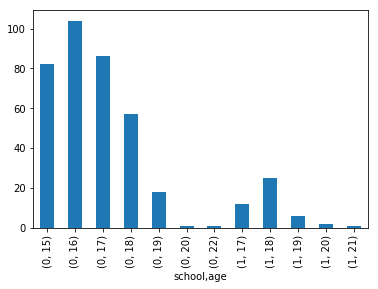

In [11]:
print(st_df.groupby(['school', 'age']).size())
st_df.groupby(['school','age']).size()
school_age = st_df.groupby(['school','age']).size()
school_age.plot.bar()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [117]:
print("Test Size is computed and modified according to specified training records of 300 \n",95/300)

Test Size is computed and modified according to specified training records of 300 
 0.31666666666666665


In [12]:
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
test_size = 0.31 # taking 70:30 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy of logistic regression classifier on test set:")
print(model_score)

Accuracy of logistic regression classifier on test set:
0.9159663865546218


C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print(metrics.confusion_matrix(y_test, y_predict))


[[41  5]
 [ 5 68]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.93      0.93      0.93        73

   micro avg       0.92      0.92      0.92       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.92      0.92      0.92       119



# Naive bayes with Iris data

# Import Iris.csv

In [28]:
iris_df=pd.read_csv("iris.csv")
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris_class=iris_df.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


# Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [50]:
array = iris_df.values
# All variables except the last column are independent variables
X = array[:, :-1] 
print("Independent Variables Xs \n",X)
# The last column G3 is the target attribute
y = array[:,-1] 
print("Dependent Variavble y\n",y)

Independent Variables Xs 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.

### Find the distribution of target variable (Class)

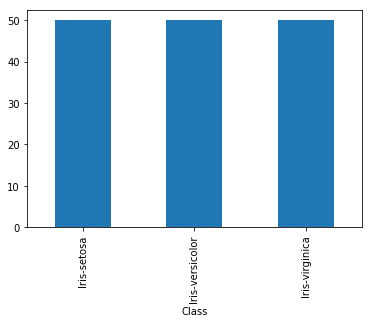

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#target=iris_df.groupby(["Class"]).count()
target=iris_df.groupby(['Class']).size()
target.plot.bar()
plt.show()

### Plot the distribution of target variable using histogram

(array([0., 3., 0.]),
 array([49.5       , 49.83333333, 50.16666667, 50.5       ]),
 <a list of 3 Patch objects>)

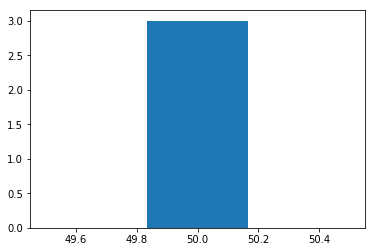

In [70]:
plt.hist(target, bins =3)
#pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

Each of the features Sepal Lenth,Sepal Width, Petal Lenth and Petal Width have no correlation there are three clusters
The distributions of the features are overlapping
Colors Indicate the three different flower categories


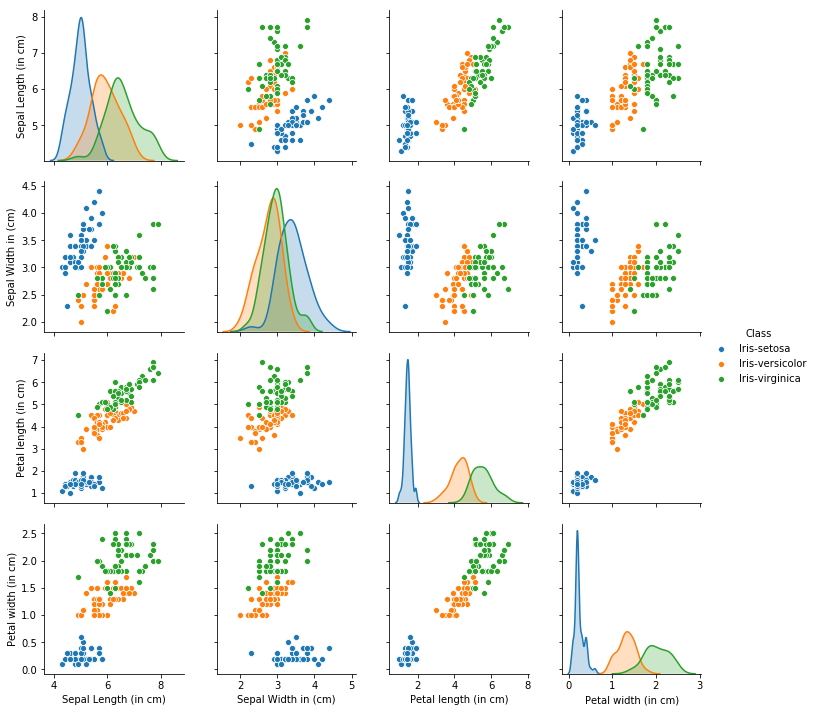

In [75]:
sns.pairplot(iris_df,hue="Class")
print("Each of the features Sepal Lenth,Sepal Width, Petal Lenth and Petal Width have no correlation there are three clusters")
print("The distributions of the features are overlapping")
print("Colors Indicate the three different flower categories")

### Summary Statistics and explain insights for at least 2 variables

       Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
count            150.000000           150.000000            150.000000   
mean               5.843333             3.054000              3.758667   
std                0.828066             0.433594              1.764420   
min                4.300000             2.000000              1.000000   
25%                5.100000             2.800000              1.600000   
50%                5.800000             3.000000              4.350000   
75%                6.400000             3.300000              5.100000   
max                7.900000             4.400000              6.900000   

       Petal width (in cm)  
count           150.000000  
mean              1.198667  
std               0.763161  
min               0.100000  
25%               0.300000  
50%               1.300000  
75%               1.800000  
max               2.500000  
Petal length could be a good feature for classification of iris flowersl

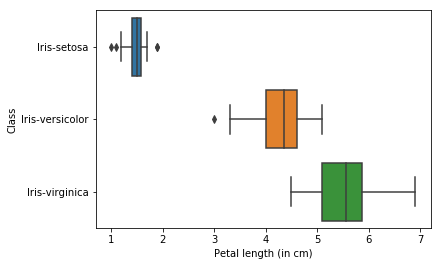

In [93]:
print(iris_df.describe())
print("Petal length could be a good feature for classification of iris flowersless ")
sns.boxplot(x="Petal length (in cm)", y="Class", data=iris_df)

Sepal length will not be able to classify Vericolor and Virginia


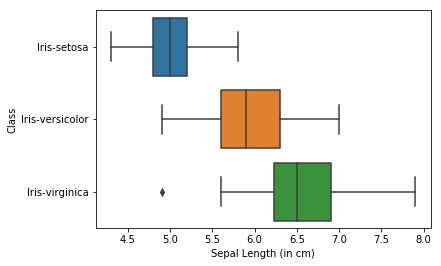

In [94]:
sns.boxplot(x="Sepal Length (in cm)", y="Class", data=iris_df)
print("Sepal length will not be able to classify Vericolor and Virginia")

### Correlation among all variables and give your insights

In [95]:
print(iris_df.corr())
print("Petal Len and Petal width have high positive correlation and coulld be the best features for classification")

                      Sepal Length (in cm)  Sepal Width in (cm)  \
Sepal Length (in cm)              1.000000            -0.109369   
Sepal Width in (cm)              -0.109369             1.000000   
Petal length (in cm)              0.871754            -0.420516   
Petal width (in cm)               0.817954            -0.356544   

                      Petal length (in cm)  Petal width (in cm)  
Sepal Length (in cm)              0.871754             0.817954  
Sepal Width in (cm)              -0.420516            -0.356544  
Petal length (in cm)              1.000000             0.962757  
Petal width (in cm)               0.962757             1.000000  
Petal Len and Petal width have high positive correlation and coulld be the best features for classification


### Split data in Training and Validation in 80:20

In [ ]:
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
test_size = 0.20 # taking 80:20 training and test set
seed = 4  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Do Feature Scaling

### Train and Fit NaiveBayes Model

In [96]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [98]:
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print("Confusion Matrix for the Test Set \n",metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        46
           1       0.97      0.88      0.92        73

   micro avg       0.91      0.91      0.91       119
   macro avg       0.90      0.92      0.90       119
weighted avg       0.92      0.91      0.91       119

Confusion Matrix for the Test Set 
 [[44  2]
 [ 9 64]]


In [107]:
t_accy=44/(44+2)
print("Percentage of Correct predictions using Tesing",t_accy*100)

Percentage of Correct predictions using Tesing 95.65217391304348


In [99]:
expected = y_train
predicted = model.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print("Confusion Matrix for the Training set \n",metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        84
           1       0.94      0.89      0.91       192

   micro avg       0.88      0.88      0.88       276
   macro avg       0.85      0.88      0.86       276
weighted avg       0.89      0.88      0.88       276

Confusion Matrix for the Training set 
 [[ 73  11]
 [ 22 170]]


In [106]:
train_pred=73/(73+11)
print("Percentage of Correct Predictions during training",train_pred*100)

Percentage of Correct Predictions during training 86.90476190476191


In [118]:
print("Training and Testing predictions* are almost same hence the classifier has done reasonably well")

Training and Testing predictions* are almost same hence the classifier has done reasonably well
